In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving bank.csv to bank (1).csv


In [ ]:
import pandas as pd
df=pd.read_csv('bank (1).csv',sep=';')

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
month_to_quarter = {
    'jan': 'Q1', 'feb': 'Q1', 'mar': 'Q1',
    'apr': 'Q2', 'may': 'Q2', 'jun': 'Q2',
    'jul': 'Q3', 'aug': 'Q3', 'sep': 'Q3',
    'oct': 'Q4', 'nov': 'Q4', 'dec': 'Q4'
}

df['quarter'] = df['month'].str.lower().map(month_to_quarter)

In [ ]:
df.drop(columns=[col for col in df.columns if col.startswith('month_')], inplace=True)
df.drop(columns=['month'], inplace=True)  # optional if you don’t want the month

In [ ]:
df['quarter']

,quarter
0,Q4
1,Q2
2,Q2
3,Q2
4,Q2
...,...
4516,Q3
4517,Q2
4518,Q3
4519,Q1


In [ ]:
# Step 1: Get job columns
# job_columns = [col for col in df.columns if col.startswith('job_')]

# Step 2: Reconstruct original 'job' column
# df['job'] = df[job_columns].idxmax(axis=1).str.replace('job_', '')

# Step 3: Define high and low income jobs
high_income = ['management', 'self-employed', 'entrepreneur']
low_income = ['blue-collar', 'housemaid', 'services', 'technician', 'unemployed']

# Step 4: Categorize into income groups
def categorize_income(job):
    job = job.lower()
    if job in high_income:
        return 'high_income'
    elif job in low_income:
        return 'low_income'
    else:
        return 'other'  # e.g. student, retired, unknown

# Step 5: Apply categorization
df['income_category'] = df['job'].apply(categorize_income)

In [ ]:
df.shape

(4521, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              4521 non-null   int64 
 1   job              4521 non-null   object
 2   marital          4521 non-null   object
 3   education        4521 non-null   object
 4   default          4521 non-null   object
 5   balance          4521 non-null   int64 
 6   housing          4521 non-null   object
 7   loan             4521 non-null   object
 8   contact          4521 non-null   object
 9   day              4521 non-null   int64 
 10  duration         4521 non-null   int64 
 11  campaign         4521 non-null   int64 
 12  pdays            4521 non-null   int64 
 13  previous         4521 non-null   int64 
 14  poutcome         4521 non-null   object
 15  y                4521 non-null   object
 16  quarter          4521 non-null   object
 17  income_category  4521 non-null   

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
display(df.isnull().sum())

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


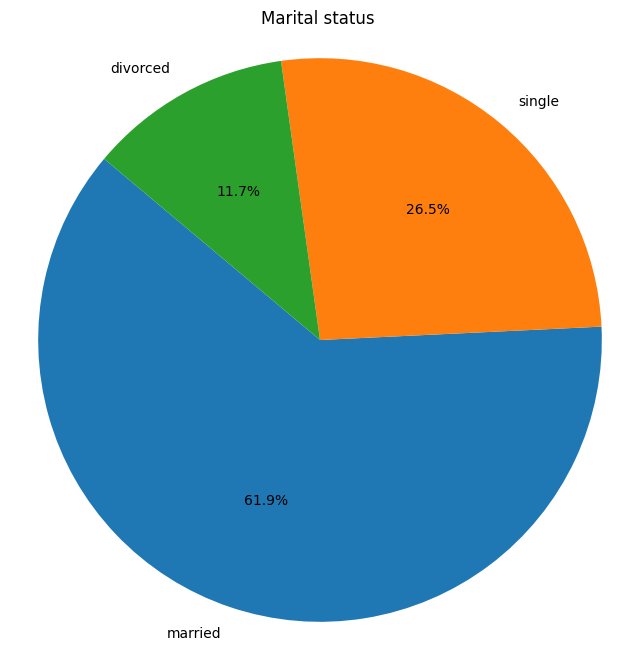

In [ ]:



department_counts = df['marital'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Marital status ')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

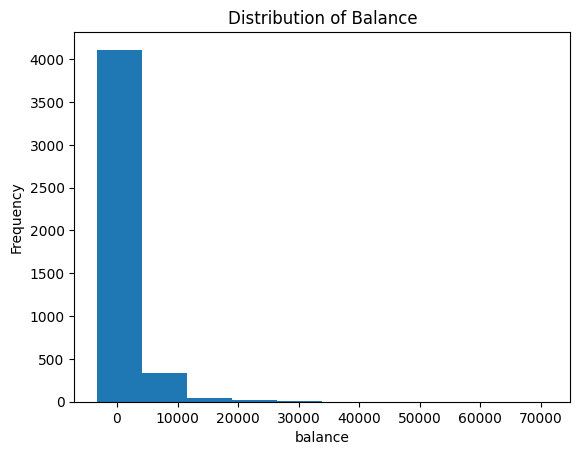

In [ ]:
plt.hist(x=df['balance'])
plt.xlabel('balance')
plt.ylabel('Frequency')
plt.title('Distribution of Balance')
plt.show()

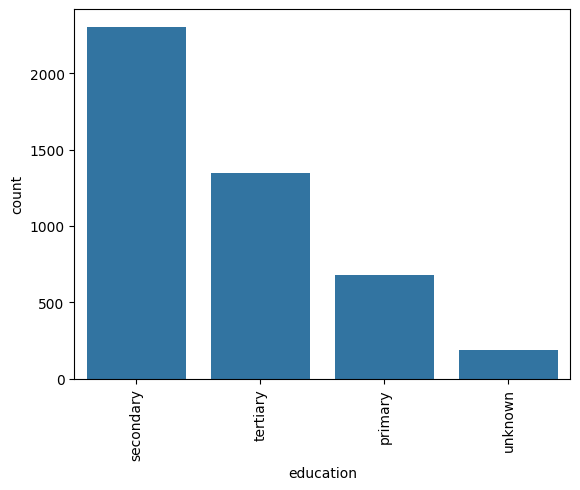

In [ ]:
job_counts = df['education'].value_counts().reset_index()
job_counts.columns = ['education', 'count']
sns.barplot(x='education', y='count', data=job_counts)
plt.xticks(rotation=90)
plt.show()

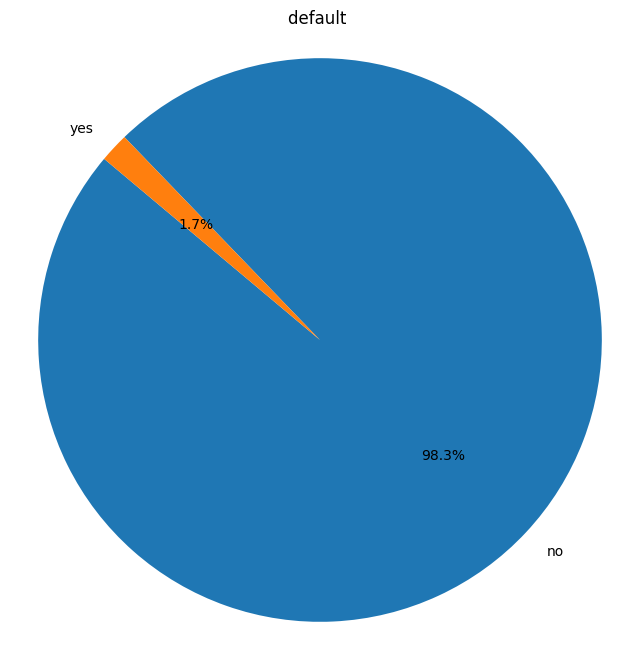

In [ ]:

department_counts = df['default'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('default ')
plt.axis('equal')
plt.show()

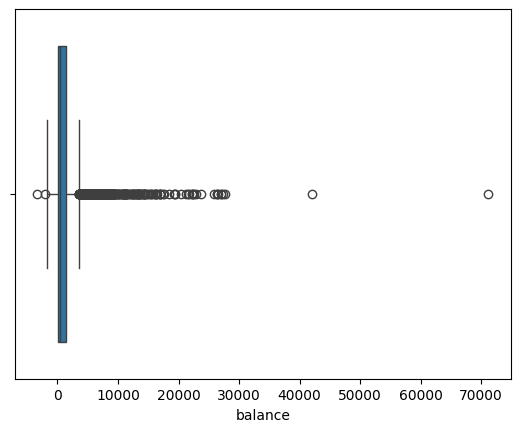

In [ ]:
sns.boxplot(x='balance', data=df)
plt.show()

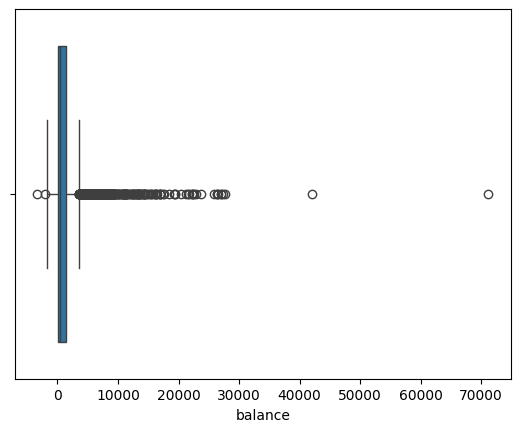

In [ ]:
sns.boxplot(x='balance', data=df)
plt.show()

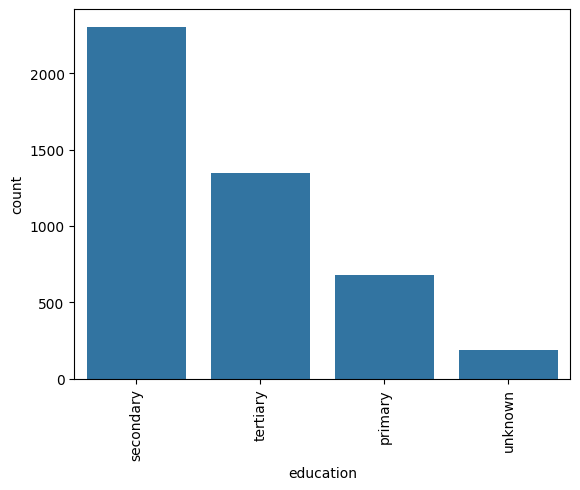

In [ ]:
job_counts = df['education'].value_counts().reset_index()
job_counts.columns = ['education', 'count']
sns.barplot(x='education', y='count', data=job_counts)
plt.xticks(rotation=90)
plt.show()

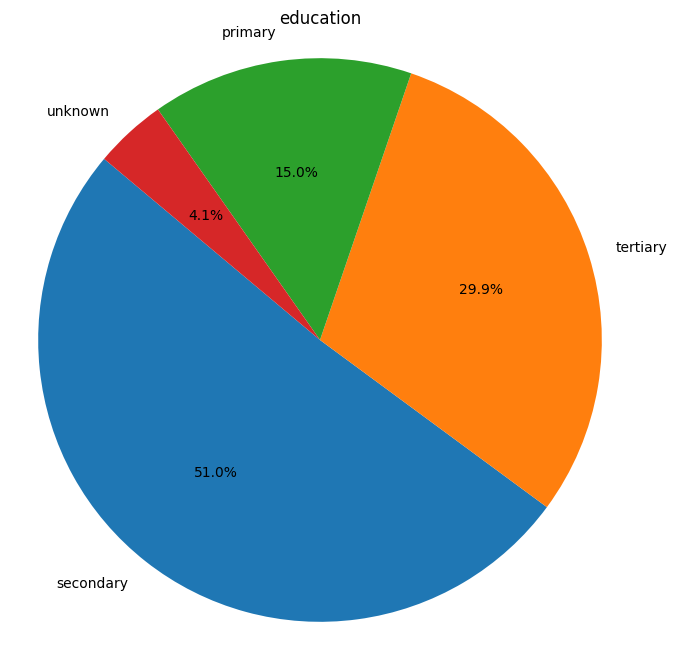

In [ ]:
# Calculate the value counts for the 'education' column
department_counts = df['education'].value_counts()

# Create a pie chart using matplotlib
plt.figure(figsize=(8, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('education')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
q3=df['balance'].quantile(.75)
q1=df['balance'].quantile(.25)
iqr=q3-q1
iqr

np.float64(1411.0)

<Axes: xlabel='balance'>

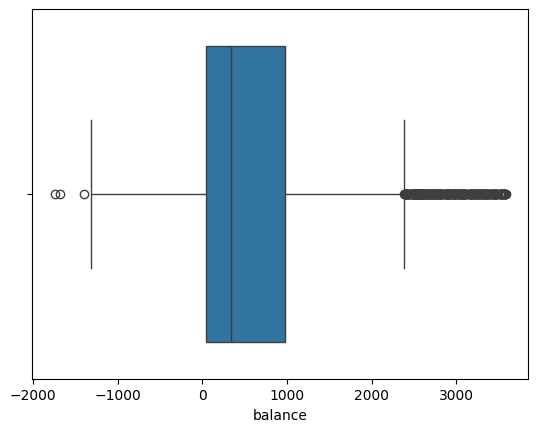

In [ ]:
upperrange= q3+1.5*iqr
bottomrange=q1-1.5*iqr
df_filtered = df[(df['balance']>bottomrange)&(df['balance']<upperrange)]
sns.boxplot(data=df_filtered,x='balance')

<Axes: xlabel='duration'>

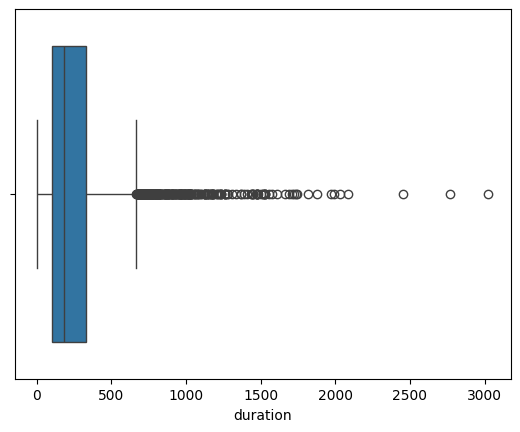

In [ ]:
sns.boxplot(x='duration', data=df)

In [ ]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y', 'quarter', 'income_category'],
      dtype='object')


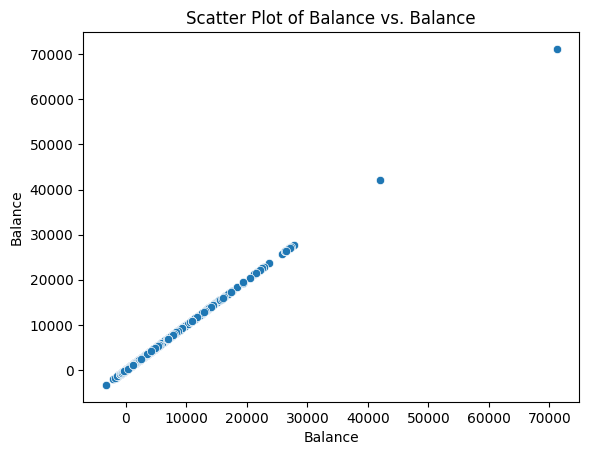

In [ ]:
sns.scatterplot(x='balance', y='balance', data=df)
plt.title('Scatter Plot of Balance vs. Balance')
plt.xlabel('Balance')
plt.ylabel('Balance')
plt.show()

In [ ]:
q3=df['duration'].quantile(.75)
q1=df['duration'].quantile(.25)
iqr=q3-q1
iqr

np.float64(225.0)

<Axes: xlabel='duration'>

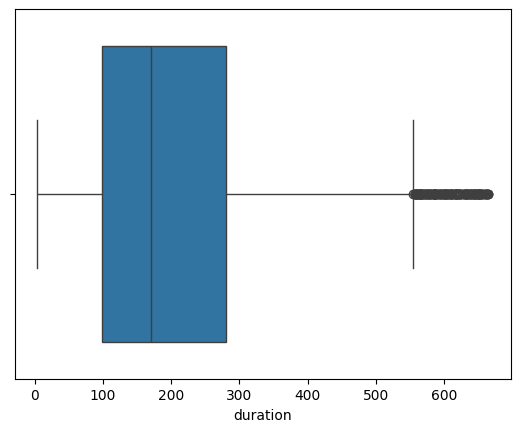

In [ ]:
upperrange= q3+1.5*iqr
bottomrange=q1-1.5*iqr
df_filtered_duration = df[(df['duration']>bottomrange)&(df['duration']<upperrange)]
sns.boxplot(data=df_filtered_duration,x='duration')

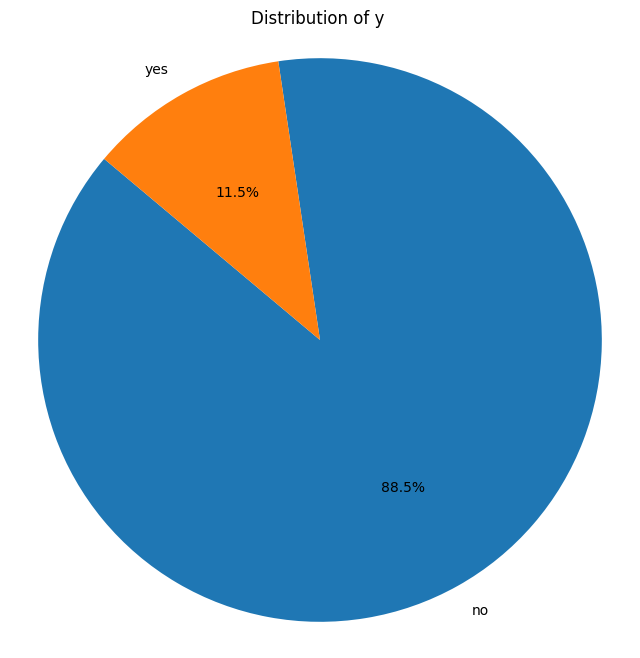

In [ ]:
# Calculate the value counts for the 'y' column
department_counts = df['y'].value_counts()

# Create a pie chart using matplotlib
plt.figure(figsize=(8, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of y ')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

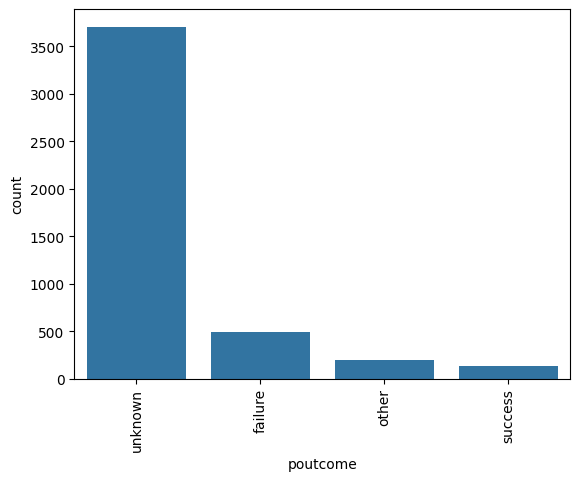

In [ ]:
job_counts = df['poutcome'].value_counts().reset_index()
job_counts.columns = ['poutcome', 'count']
sns.barplot(x='poutcome', y='count', data=job_counts)
plt.xticks(rotation=90)
plt.show()

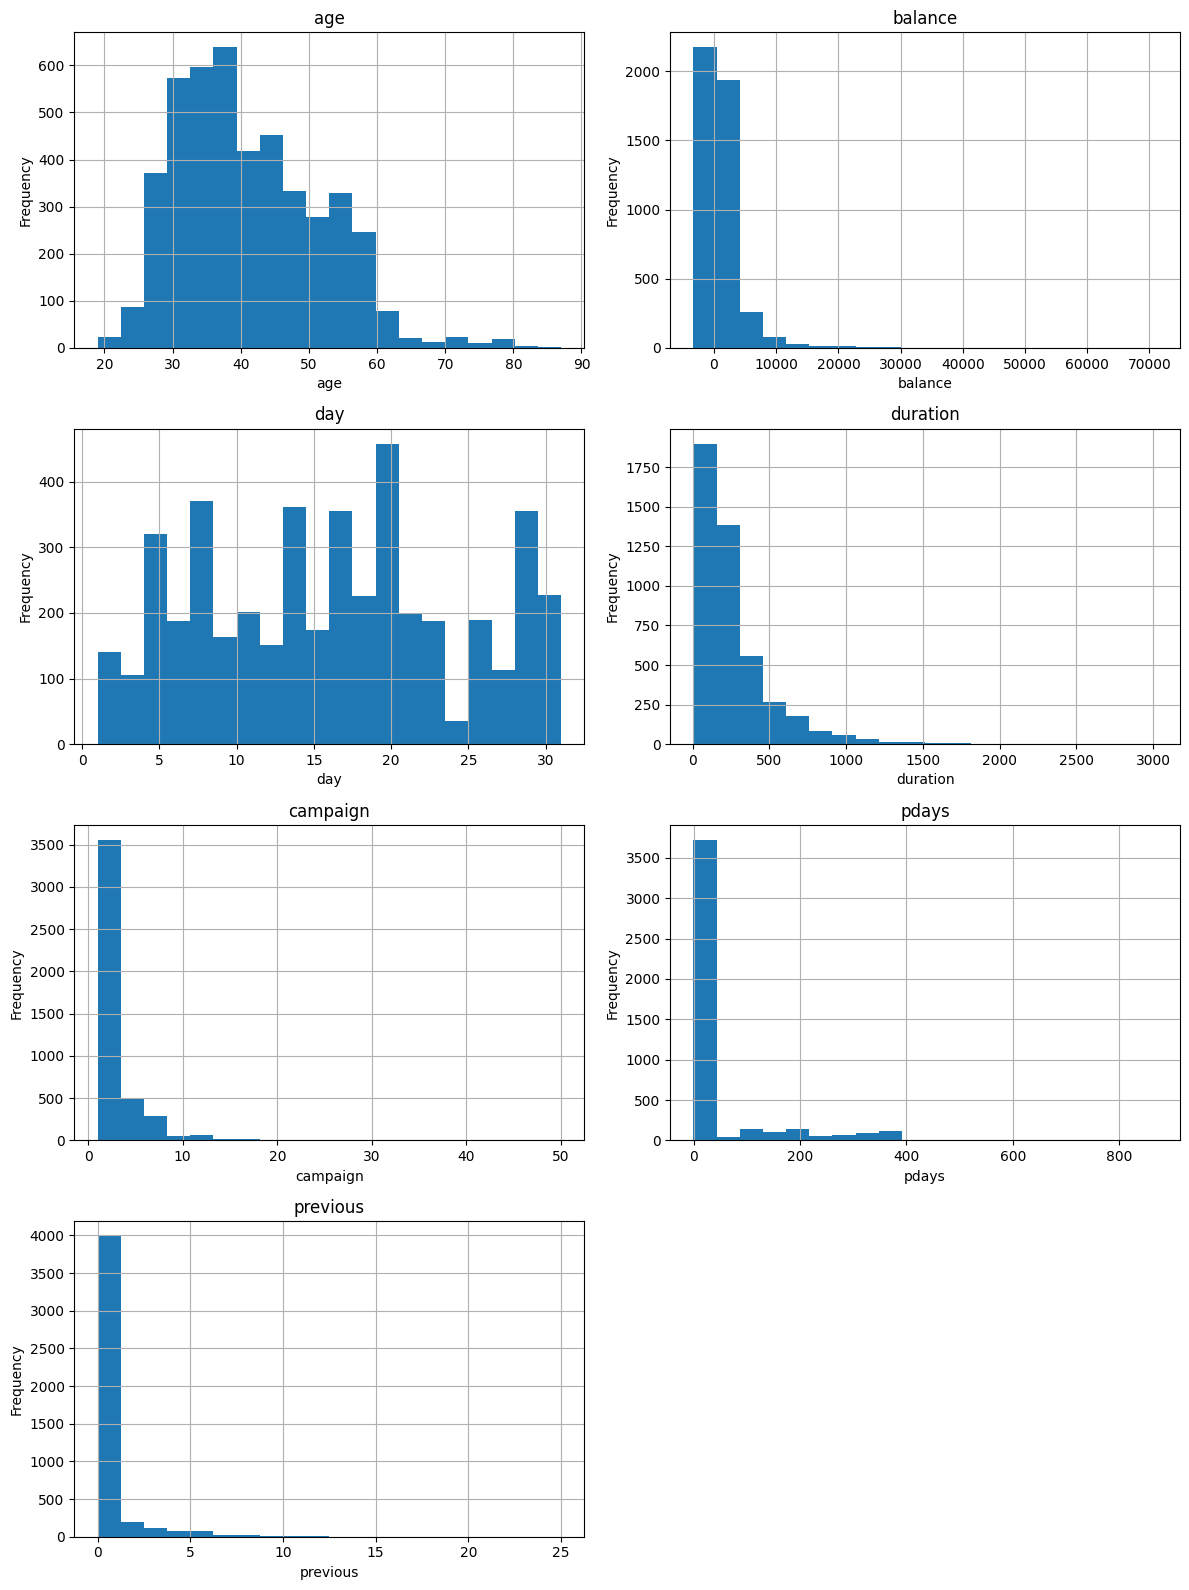

In [ ]:
# Draw histograms for each column in the dataset
# Filter out boolean columns before plotting histograms
numerical_data = df.select_dtypes(include=np.number)

num_columns = numerical_data.shape[1]
num_rows = (num_columns + 1) // 2 #Calculate the number of rows for subplots

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, num_rows * 4)) # Adjust figsize based on num_rows

# Flatten axes if multiple rows are used
axes = axes.flatten()

for i, column in enumerate(numerical_data.columns):
   numerical_data[column].hist(ax=axes[i], bins=20)  #Adjust bins as needed
   axes[i].set_title(f"{column}")
   axes[i].set_xlabel(column)
   axes[i].set_ylabel("Frequency")

# If there's an odd number of column, remove the empty subplot
if num_columns % 2 !=0:
    fig.delaxes(axes[-1])

plt.tight_layout()  #Adjust layout for spacing between subplots
plt.show()

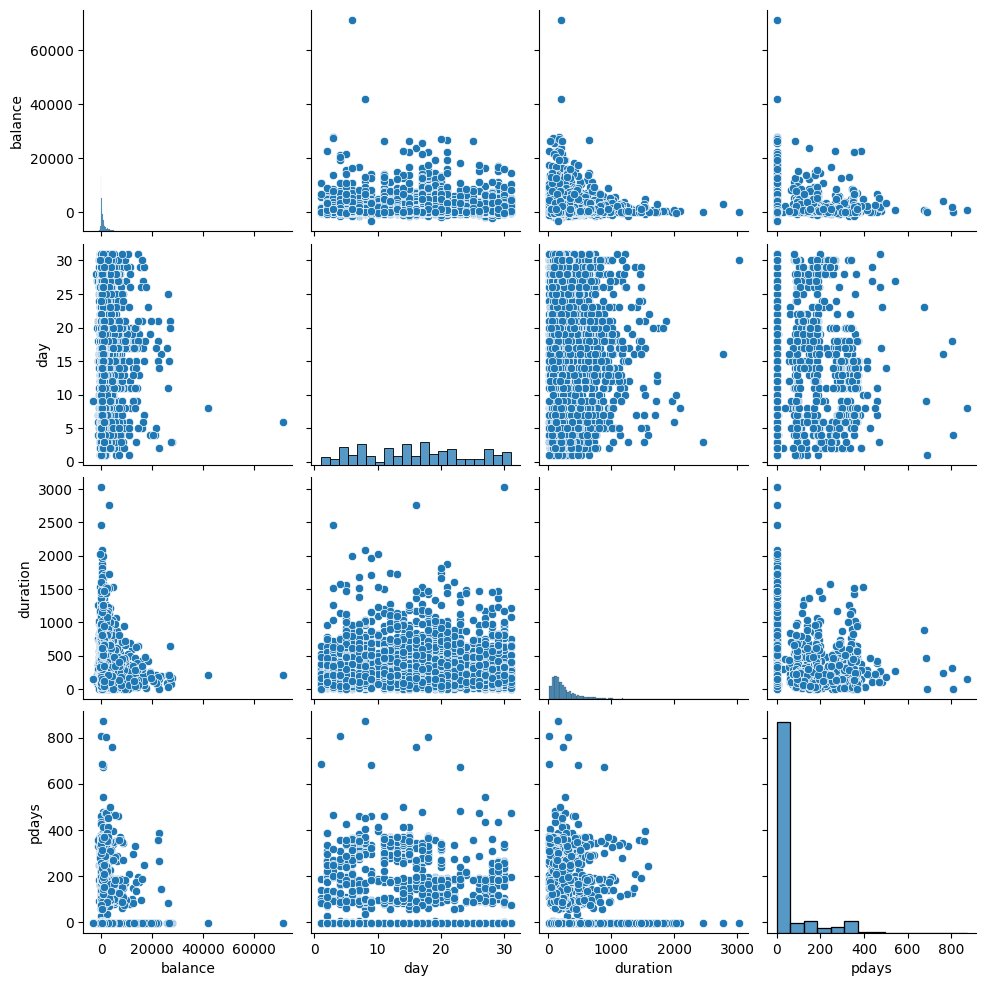

In [ ]:
sns.pairplot(df[['default','balance','housing','loan','contact','day','duration','pdays','poutcome','y']])
plt.show()

In [ ]:
# Select only numerical columns for correlation matrix
numerical_data = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
display(correlation_matrix)

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


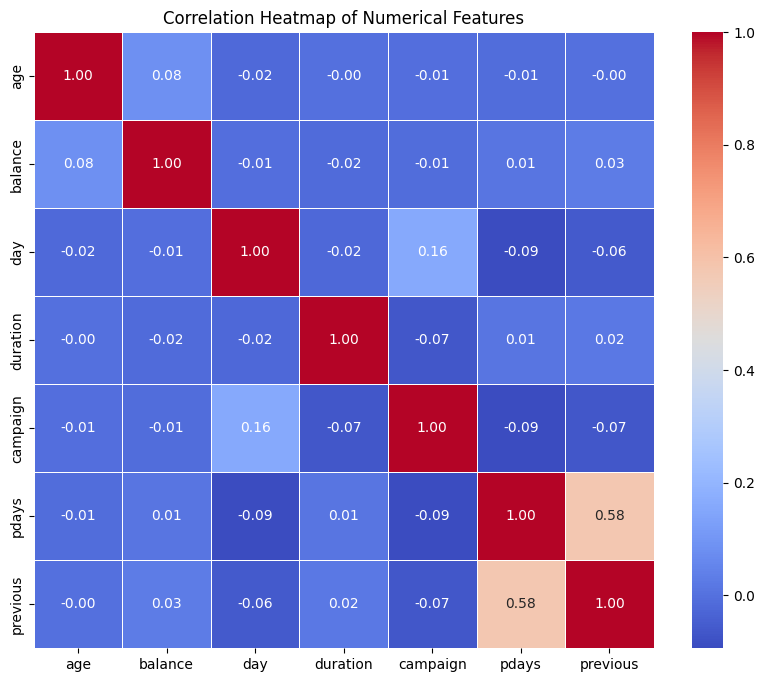

In [ ]:

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:


columns_to_drop = ['job']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df = df.drop(existing_columns_to_drop, axis=1)
display(df.head())

,age,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y,quarter,income_category
0,30,married,primary,no,1787,no,no,cellular,19,79,1,-1,0,unknown,no,Q4,low_income
1,33,married,secondary,no,4789,yes,yes,cellular,11,220,1,339,4,failure,no,Q2,low_income
2,35,single,tertiary,no,1350,yes,no,cellular,16,185,1,330,1,failure,no,Q2,high_income
3,30,married,tertiary,no,1476,yes,yes,unknown,3,199,4,-1,0,unknown,no,Q2,high_income
4,59,married,secondary,no,0,yes,no,unknown,5,226,1,-1,0,unknown,no,Q2,low_income


In [ ]:

df_final = pd.get_dummies(df, drop_first=True)

print(df_final.head())

   age  balance  day  duration  campaign  pdays  previous  marital_married  \
0   30     1787   19        79         1     -1         0             True   
1   33     4789   11       220         1    339         4             True   
2   35     1350   16       185         1    330         1            False   
3   30     1476    3       199         4     -1         0             True   
4   59        0    5       226         1     -1         0             True   

   marital_single  education_secondary  ...  contact_unknown  poutcome_other  \
0           False                False  ...            False           False   
1           False                 True  ...            False           False   
2            True                False  ...            False           False   
3           False                False  ...             True           False   
4           False                 True  ...             True           False   

   poutcome_success  poutcome_unknown  y_yes  quar

In [ ]:


columns_to_drop = ['job']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df = df.drop(existing_columns_to_drop, axis=1)
display(df.head())

,age,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y,quarter,income_category
0,30,married,primary,no,1787,no,no,cellular,19,79,1,-1,0,unknown,no,Q4,low_income
1,33,married,secondary,no,4789,yes,yes,cellular,11,220,1,339,4,failure,no,Q2,low_income
2,35,single,tertiary,no,1350,yes,no,cellular,16,185,1,330,1,failure,no,Q2,high_income
3,30,married,tertiary,no,1476,yes,yes,unknown,3,199,4,-1,0,unknown,no,Q2,high_income
4,59,married,secondary,no,0,yes,no,unknown,5,226,1,-1,0,unknown,no,Q2,low_income


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Apply get_dummies
df_final = pd.get_dummies(df, drop_first=True)

# Print the head of the dataframe to confirm
print(df_final.head())

   age  balance  day  duration  campaign  pdays  previous  marital_married  \
0   30     1787   19        79         1     -1         0             True   
1   33     4789   11       220         1    339         4             True   
2   35     1350   16       185         1    330         1            False   
3   30     1476    3       199         4     -1         0             True   
4   59        0    5       226         1     -1         0             True   

   marital_single  education_secondary  ...  contact_unknown  poutcome_other  \
0           False                False  ...            False           False   
1           False                 True  ...            False           False   
2            True                False  ...            False           False   
3           False                False  ...             True           False   
4           False                 True  ...             True           False   

   poutcome_success  poutcome_unknown  y_yes  quar

In [ ]:
df_final.isna().sum()

,0
age,0
balance,0
day,0
duration,0
campaign,0
pdays,0
previous,0
marital_married,0
marital_single,0
education_secondary,0


In [ ]:
df_final.shape

(4521, 26)

In [ ]:
df_final.shape[1]


26

In [ ]:
for i in range(df_final.shape[1]):
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [ ]:
for i in range(df_final.shape[1]):
  print(df_final.iloc[:,i].unique())
  print(df_final.iloc[:,i].value_counts())

[30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]
age
34    231
32    224
31    199
36    188
33    186
     ... 
76      2
81      1
86      1
87      1
84      1
Name: count, Length: 67, dtype: int64
[ 1787  4789  1350 ...  -333 -3313  1137]
balance
0       357
2        24
1        15
4        13
23       11
       ... 
5304      1
6969      1
572       1
164       1
4554      1
Name: count, Length: 2353, dtype: int64
[19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 18 12 21 26 22  2  4 15  8
 28  9  1 10 31 25 24]
day
20    257
18    226
19    201
21    198
14    195
17    191
7     190
6     187
28    181
5     181
8     180
29    175
15    174
30    168
13    166
16    164
9     163
11    152
12    151
4     139
2     114
27    113
26    110
3     105
23    102
22     86
25     80
31     59
10     50
24     36
1      27
Name: count

In [ ]:
# Replace specific values in the DataFrame
df_final = df_final.copy()
df_final = df_final.replace(to_replace='A ', value='A')
df_final = df_final.replace(to_replace='I', value='A')

# Display the head of the dataframe to see the changes
display(df_final.head())

,age,balance,day,duration,campaign,pdays,previous,marital_married,marital_single,education_secondary,...,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y_yes,quarter_Q2,quarter_Q3,quarter_Q4,income_category_low_income,income_category_other
0,30,1787,19,79,1,-1,0,True,False,False,...,False,False,False,True,False,False,False,True,True,False
1,33,4789,11,220,1,339,4,True,False,True,...,False,False,False,False,False,True,False,False,True,False
2,35,1350,16,185,1,330,1,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,30,1476,3,199,4,-1,0,True,False,False,...,True,False,False,True,False,True,False,False,False,False
4,59,0,5,226,1,-1,0,True,False,True,...,True,False,False,True,False,True,False,False,True,False


In [ ]:

df_final.iloc[:,8].value_counts()

,count
marital_single,
False,3325
True,1196


In [ ]:
print(df_final)

      age  balance  day  duration  campaign  pdays  previous  marital_married  \
0      30     1787   19        79         1     -1         0             True   
1      33     4789   11       220         1    339         4             True   
2      35     1350   16       185         1    330         1            False   
3      30     1476    3       199         4     -1         0             True   
4      59        0    5       226         1     -1         0             True   
...   ...      ...  ...       ...       ...    ...       ...              ...   
4516   33     -333   30       329         5     -1         0             True   
4517   57    -3313    9       153         1     -1         0             True   
4518   57      295   19       151        11     -1         0             True   
4519   28     1137    6       129         4    211         3             True   
4520   44     1136    3       345         2    249         7            False   

      marital_single  educa

In [ ]:
df_final.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
from sklearn.model_selection import train_test_split
X = df_final.drop('previous', axis=1)
y = df_final['previous']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,train_size=0.70)

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
print(predictions)

[ 0  0  0  0  0  1  0  1  0  1  0  0  0  0  1  0  0  0  0  0  8  0  1  0
  0  0  0  0  0  1  0  0  0  0  0  0  1  1  0  0  0  1  1  0  0  0  0  0
  0  0  0  1  1  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  1
  0  0  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0 18  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0
  0  0  0  1  0  0  1  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
  1  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  1  0  1  0  0  1  0  0
  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  1  0  1  0  1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0  1  1  1  0  0  0
  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0
  1  1  0  0  0  0  0  0  0  0  1  1  0  1  0  1  0  0  1  0  0  0  1  0
  0  0  0  1  0  0  0  0  0  0  1  0  0  0  0  0  1

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       741
           1       0.35      0.98      0.52        57
           2       0.00      0.00      0.00        37
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00        14
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         0

    accuracy                           0.88       905
   macro avg       0.10      0.14      0.11       905
weighted avg       0.84      0.88      0.85       905



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

KNN_classification




In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
X = df.drop('previous', axis=1)
y = df['previous'] # Setting 'y_yes' as the target variable
X

,age,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,poutcome,y,quarter,income_category
0,30,married,primary,no,1787,no,no,cellular,19,79,1,-1,unknown,no,Q4,low_income
1,33,married,secondary,no,4789,yes,yes,cellular,11,220,1,339,failure,no,Q2,low_income
2,35,single,tertiary,no,1350,yes,no,cellular,16,185,1,330,failure,no,Q2,high_income
3,30,married,tertiary,no,1476,yes,yes,unknown,3,199,4,-1,unknown,no,Q2,high_income
4,59,married,secondary,no,0,yes,no,unknown,5,226,1,-1,unknown,no,Q2,low_income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,married,secondary,no,-333,yes,no,cellular,30,329,5,-1,unknown,no,Q3,low_income
4517,57,married,tertiary,yes,-3313,yes,yes,unknown,9,153,1,-1,unknown,no,Q2,high_income
4518,57,married,secondary,no,295,no,no,cellular,19,151,11,-1,unknown,no,Q3,low_income
4519,28,married,secondary,no,1137,no,no,cellular,6,129,4,211,other,no,Q1,low_income


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=25)

In [ ]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
display(y_pred)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
knn

,Predicted,Actual
2398,0,0
800,0,5
2288,0,0
2344,0,0
3615,0,0
...,...,...
3589,0,1
3128,0,0
3259,0,0
4239,0,0


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8530386740331491

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[741,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 20,  28,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 19,  15,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,  16,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  9,   4,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  4,   4,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  5,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  4,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

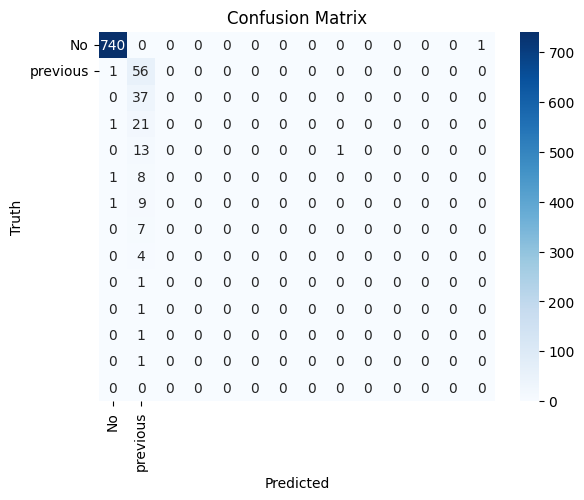

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "previous"], yticklabels=["No", "previous"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

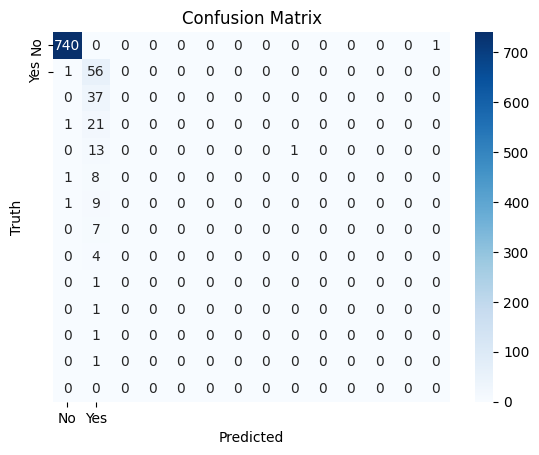

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       741
           1       0.35      0.49      0.41        57
           2       0.17      0.08      0.11        37
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00        14
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1

    accuracy                           0.85       905
   macro avg       0.11      0.12      0.11       905
weighted avg       0.78      0.85      0.81       905



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SUPPORT VECTOR MACHINE CLASSIFICATION(SVM)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='linear')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

# Load df if not already loaded (assuming df is loaded in a previous cell based on context)
if 'df' not in globals():
    df = pd.read_csv("/content/bank.csv", sep=';')

X = df.drop('previous', axis=1)
y = df['previous']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression(C=1e9, max_iter=1000) # Increased max_iter
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
y_pred = predictions

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


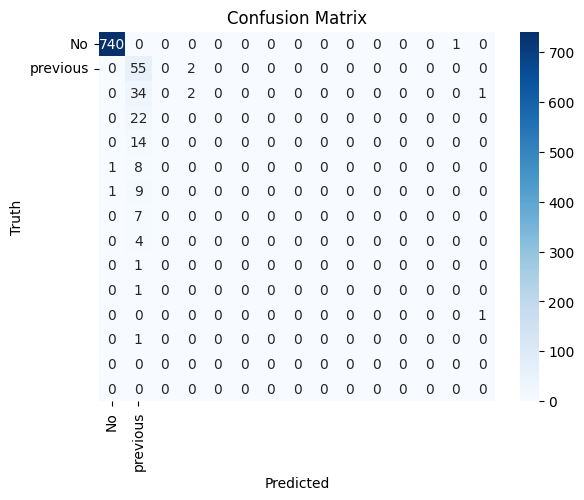

In [ ]:
      # @title Default title text
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "previous"], yticklabels=["No", "previous"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       741
           1       0.35      0.96      0.52        57
           2       0.00      0.00      0.00        37
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00        14
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         0
          25       0.00      0.00      0.00         0

    accuracy                           0.88       905
   macro avg       0.09      0.13      0.10       905
weighted avg       0.84   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

DECISION TREE ALGORITHM FOR CLASSIFICATION

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

from matplotlib import pyplot as plt

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3616, 25)
(3616,)
(905, 25)
(905,)


In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       741
           1       0.37      0.30      0.33        57
           2       0.23      0.27      0.25        37
           3       0.19      0.23      0.21        22
           4       0.14      0.21      0.17        14
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         7
           8       0.25      0.25      0.25         4
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         0

    accuracy              

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       741
           1       0.37      0.30      0.33        57
           2       0.23      0.27      0.25        37
           3       0.19      0.23      0.21        22
           4       0.14      0.21      0.17        14
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         7
           8       0.25      0.25      0.25         4
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         0

    accuracy              

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

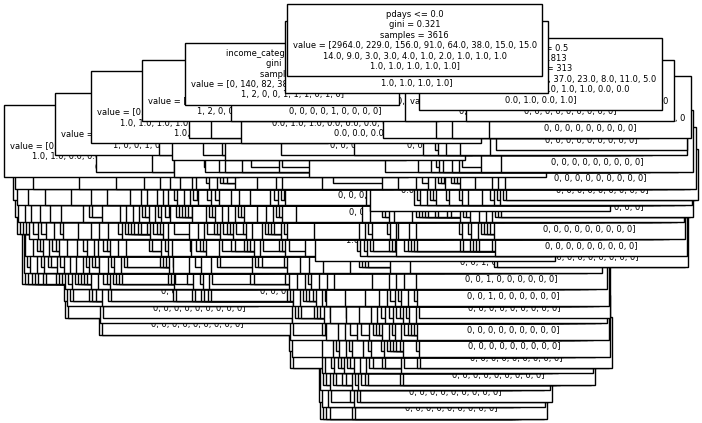

In [ ]:
plot_tree(dt, fontsize=6, feature_names=X.columns.tolist())
plt.savefig('out.pdf')

XG_boost

In [ ]:
import numpy as np # linear algebra
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('previous', axis=1)
y = df['previous']
X = pd.get_dummies(X, drop_first=True)

In [ ]:
#Split the dataset into train and Test
seed = 7
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the data
seed = 7
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Use factorize to get contiguous integer labels for the target variables after splitting
y_train_encoded, unique_classes_train = pd.factorize(y_train)
y_test_encoded, unique_classes_test = pd.factorize(y_test)

# Set num_class based on the number of unique classes in the training set
num_classes = len(unique_classes_train)

model2 = XGBClassifier(objective='multi:softmax', num_class=num_classes)

train_model3 = model2.fit(X_train, y_train_encoded)
pred3_encoded = train_model3.predict(X_test)

# Note: The encoded labels in pred3_encoded and y_test_encoded are relative to the unique classes in y_test.
# For evaluation, use the encoded test set.
print("Accuracy for model 3: %.2f" % (accuracy_score(y_test_encoded, pred3_encoded) * 100))

# If you need the original class labels for predictions, you would need to map pred3_encoded back
# using unique_classes_test or a combined mapping from the original y

Accuracy for model 3: 85.92


In [ ]:
xgb2 = xgb.XGBClassifier(
 learning_rate =0.7,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train, y_train)
pred8 = rfc_model.predict(X_test)
print("Accuracy for Random Forest Model: %.2f" % (accuracy_score(y_test, pred8) * 100))

Accuracy for Random Forest Model: 87.25
